In [33]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

df = pd.read_csv(r'C:\Users\jean-\Documents\Mines_3A\Cours\Computer Visualization\covizReport\data\8\DataIris\iris.data',sep=",")
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [30]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

df = swap_columns(df, 'sepal_width', 'sepal_length')
df = swap_columns(df, 'petal_width', 'petal_length')

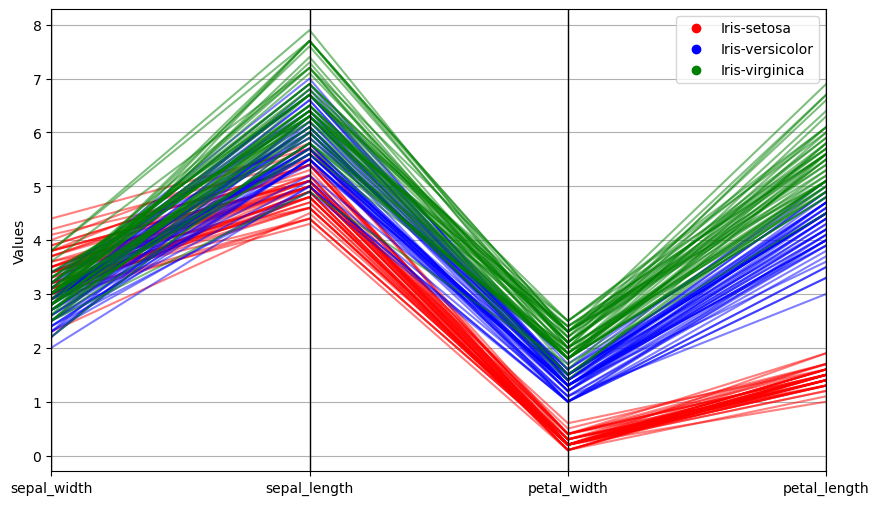

In [31]:
colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'class', color=('red', 'blue', 'green'), alpha=0.5)

legend_handles = [plt.Line2D([],[], color=color, marker='o', linestyle='None') for color in colors.values()]

plt.legend(legend_handles, colors.keys())

plt.ylabel('Values')

plt.show()

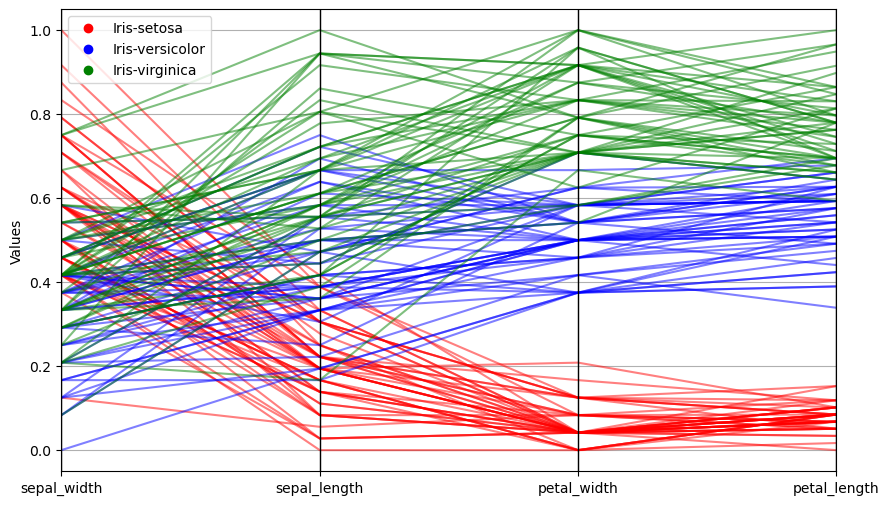

In [32]:
features = df.drop('class', axis=1)
label = df['class']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['class'] = label

colors = {'Iris-setosa':'red', 'Iris-versicolor':'blue', 'Iris-virginica':'green'}

plt.figure(figsize=(10, 6))
parallel_coordinates(scaled_df, 'class', color=('red', 'blue', 'green'), alpha=0.5)

legend_handles = [plt.Line2D([],[], color=color, marker='o', linestyle='None') for color in colors.values()]

plt.legend(legend_handles, colors.keys())

plt.ylabel('Values')

plt.show()

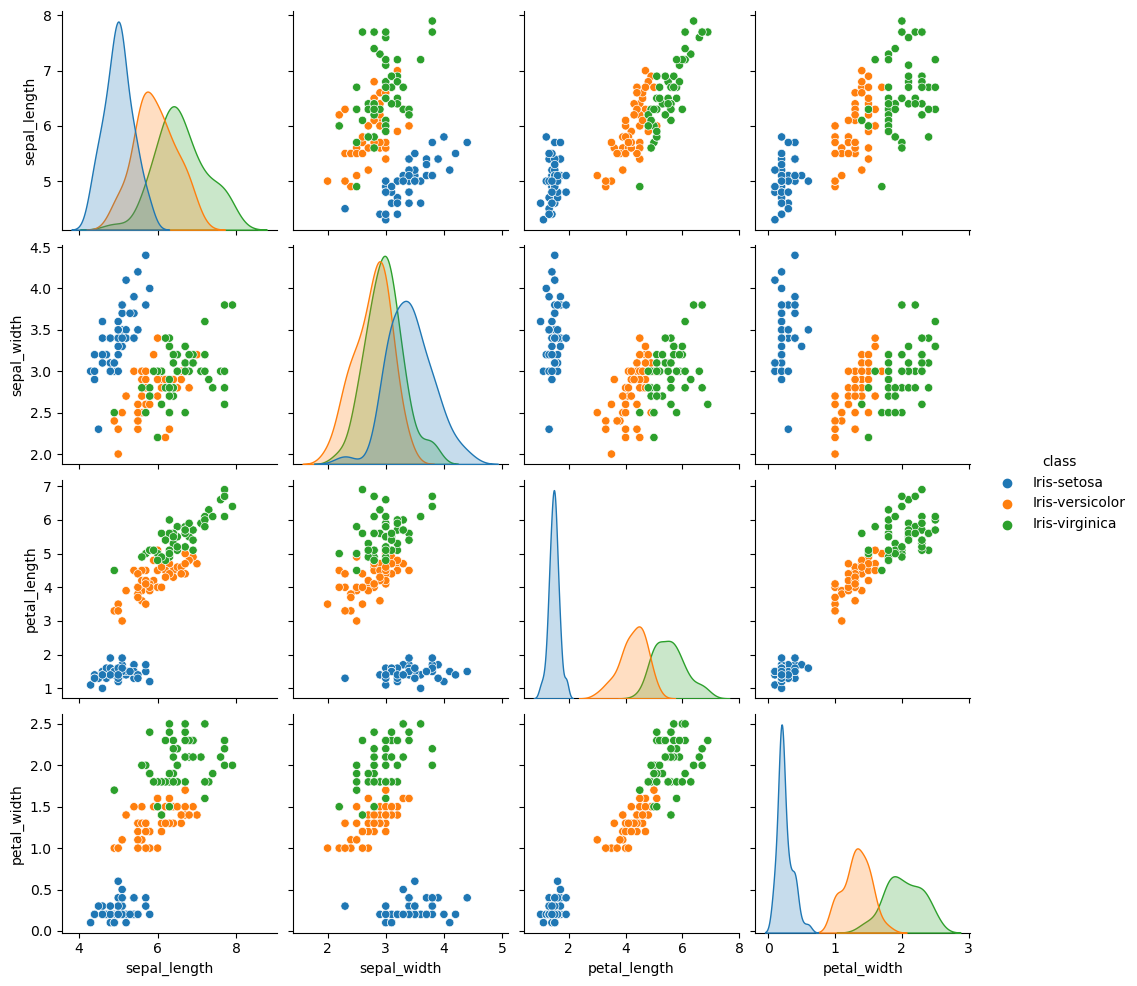

In [34]:
sns.pairplot(df, hue='class', height=2.5)
plt.show()